**Feature Extraction Transfer Learning**

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/cancer_data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(

    include_top = False,
    input_shape = (150,150,3)
)

In [ ]:
model = Sequential()
model.add(conv_base),
model.add(Flatten()),
model.add(Dense(512, activation= 'relu')),
model.add(Dense(1, activation= 'sigmoid'))

In [ ]:
conv_base.trainable = False

In [ ]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),A
        batch_size=batch_size,
        class_mode='binary')

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

Epoch 1/10
372/372 [==============================] - 98s 237ms/step - loss: 0.4126 - accuracy: 0.8216 - val_loss: 0.3114 - val_accuracy: 0.8620
Epoch 2/10
372/372 [==============================] - 84s 227ms/step - loss: 0.3213 - accuracy: 0.8600 - val_loss: 0.3836 - val_accuracy: 0.8160
Epoch 3/10
372/372 [==============================] - 85s 229ms/step - loss: 0.2979 - accuracy: 0.8699 - val_loss: 0.3902 - val_accuracy: 0.8095
Epoch 4/10
372/372 [==============================] - 84s 226ms/step - loss: 0.2958 - accuracy: 0.8703 - val_loss: 0.3449 - val_accuracy: 0.8445
Epoch 5/10
372/372 [==============================] - 85s 228ms/step - loss: 0.2841 - accuracy: 0.8764 - val_loss: 0.2653 - val_accuracy: 0.8985
Epoch 6/10
372/372 [==============================] - 84s 226ms/step - loss: 0.2708 - accuracy: 0.8849 - val_loss: 0.2722 - val_accuracy: 0.8955
Epoch 7/10
372/372 [==============================] - 84s 226ms/step - loss: 0.2738 - accuracy: 0.8834 - val_loss: 0.2567 - val_ac

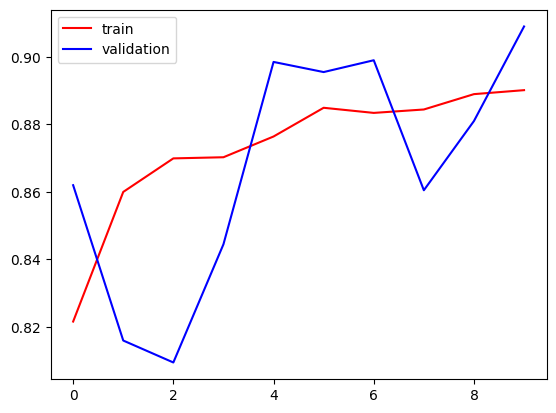

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

**Validation Accuracy is 90% in Future Extraction**

**Fine Tunning Transfer Learning**

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_3 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [61]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [63]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

Epoch 1/10
372/372 [==============================] - 85s 229ms/step - loss: 0.2191 - accuracy: 0.9088 - val_loss: 0.2456 - val_accuracy: 0.8960
Epoch 2/10
372/372 [==============================] - 86s 231ms/step - loss: 0.2011 - accuracy: 0.9174 - val_loss: 0.2463 - val_accuracy: 0.8920
Epoch 3/10
372/372 [==============================] - 86s 230ms/step - loss: 0.1954 - accuracy: 0.9188 - val_loss: 0.2963 - val_accuracy: 0.8640
Epoch 4/10
372/372 [==============================] - 87s 233ms/step - loss: 0.1880 - accuracy: 0.9211 - val_loss: 0.2011 - val_accuracy: 0.9260
Epoch 5/10
372/372 [==============================] - 86s 230ms/step - loss: 0.1815 - accuracy: 0.9258 - val_loss: 0.2189 - val_accuracy: 0.9235
Epoch 6/10
372/372 [==============================] - 86s 230ms/step - loss: 0.1700 - accuracy: 0.9290 - val_loss: 0.3269 - val_accuracy: 0.8655
Epoch 7/10
372/372 [==============================] - 85s 228ms/step - loss: 0.1644 - accuracy: 0.9316 - val_loss: 0.1969 - val_ac

**Almost Accuracy in Fine Tunning is 92-93%**